# Proyek Analisis Data: Bike Sharing Dataset
- Nama:Muhammad Haikal Rahman
- Email: muhammadhaikalrahman81@gmail.com
- Id Dicoding: haikal1231

## Menentukan Pertanyaan Bisnis

- Apakah kecepatan angin atau kelembapan mempengaruhi keputusan masyarakat untuk menyewa sepeda?
- Apakah ada jam (jam) tertentu saat rental sepeda mencapai puncak atau penurunannya?

## Menyiapkan semua library yang dibutuhkan

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

### Pertanyaan 1:

In [36]:
path=r"C:\Users\LENOVO\Documents\udemy\dicoding\E-commerce-public-dataset\Bike-sharing-dataset\\"
data_1=pd.read_csv(path+"day.csv")
data_1.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


### Pertanyaan 2:

In [37]:
data_2=pd.read_csv(path+"hour.csv")
data_2.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

### Pertanyaan 1:

In [38]:
# Check for Missing Values
missing_values = data_1.isnull().sum()
print("Missing Values:")
print(missing_values)

# Check for Duplicate Data
duplicate_data = data_1.duplicated().sum()
print("\nDuplicate Data Count:", duplicate_data)

# Pilih kolom untuk identifikasi outlier
column_to_check = "temp"

# Hitung kuartil ke-1 (Q1) dan kuartil ke-3 (Q3)
Q1 = data_1[column_to_check].quantile(0.25)
Q3 = data_1[column_to_check].quantile(0.75)

# Hitung Interquartile Range (IQR)
IQR = Q3 - Q1

# Hitung batas bawah dan batas atas untuk outlier
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identifikasi outlier
outliers = data_1[(data_1[column_to_check] < lower_bound) | (data_1[column_to_check] > upper_bound)]

# Tampilkan data outlier
print("Outliers:")
print(outliers)

Missing Values:
instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Duplicate Data Count: 0
Outliers:
Empty DataFrame
Columns: [instant, dteday, season, yr, mnth, holiday, weekday, workingday, weathersit, temp, atemp, hum, windspeed, casual, registered, cnt]
Index: []


### Pertanyaan 2:

In [39]:
# Check for Missing Values
missing_values = data_2.isnull().sum()
print("Missing Values:")
print(missing_values)

# Check for Duplicate Data
duplicate_data = data_2.duplicated().sum()
print("\nDuplicate Data Count:", duplicate_data)

# Pilih kolom untuk identifikasi outlier
column_to_check = "temp"

# Hitung kuartil ke-1 (Q1) dan kuartil ke-3 (Q3)
Q1 = data_2[column_to_check].quantile(0.25)
Q3 = data_2[column_to_check].quantile(0.75)

# Hitung Interquartile Range (IQR)
IQR = Q3 - Q1

# Hitung batas bawah dan batas atas untuk outlier
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identifikasi outlier
outliers = data_2[(data_2[column_to_check] < lower_bound) | (data_1[column_to_check] > upper_bound)]

# Tampilkan data outlier
print("Outliers:")
print(outliers)

Missing Values:
instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Duplicate Data Count: 0
Outliers:
Empty DataFrame
Columns: [instant, dteday, season, yr, mnth, hr, holiday, weekday, workingday, weathersit, temp, atemp, hum, windspeed, casual, registered, cnt]
Index: []


### Cleaning Data

### Pertanyaan 1:

In [40]:
# 1. Menghapus Duplicate Data
data_1.drop_duplicates(inplace=True)

# 2. Menangani Outlier (Contoh: Menghapus outlier)
Q1 = data_1["temp"].quantile(0.25)
Q3 = data_1["temp"].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

data_1 = data_1[(data_1["temp"] >= lower_bound) & (data_1["temp"] <= upper_bound)]

# Tampilkan data setelah pembersihan
print(data_1.head())

   instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1        0        6           0   
1        2  2011-01-02       1   0     1        0        0           0   
2        3  2011-01-03       1   0     1        0        1           1   
3        4  2011-01-04       1   0     1        0        2           1   
4        5  2011-01-05       1   0     1        0        3           1   

   weathersit      temp     atemp       hum  windspeed  casual  registered  \
0           2  0.344167  0.363625  0.805833   0.160446     331         654   
1           2  0.363478  0.353739  0.696087   0.248539     131         670   
2           1  0.196364  0.189405  0.437273   0.248309     120        1229   
3           1  0.200000  0.212122  0.590435   0.160296     108        1454   
4           1  0.226957  0.229270  0.436957   0.186900      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600  


### Pertanyaan 2:

In [41]:
# 1. Menghapus Duplicate Data
data_2.drop_duplicates(inplace=True)

# 2. Menangani Outlier (Contoh: Menghapus outlier)
Q1 = data_2["temp"].quantile(0.25)
Q3 = data_2["temp"].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

data_2 = data_2[(data_2["temp"] >= lower_bound) & (data_2["temp"] <= upper_bound)]

# Tampilkan data setelah pembersihan
print(data_2.head())

   instant      dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1   0        0        6           0   
1        2  2011-01-01       1   0     1   1        0        6           0   
2        3  2011-01-01       1   0     1   2        0        6           0   
3        4  2011-01-01       1   0     1   3        0        6           0   
4        5  2011-01-01       1   0     1   4        0        6           0   

   weathersit  temp   atemp   hum  windspeed  casual  registered  cnt  
0           1  0.24  0.2879  0.81        0.0       3          13   16  
1           1  0.22  0.2727  0.80        0.0       8          32   40  
2           1  0.22  0.2727  0.80        0.0       5          27   32  
3           1  0.24  0.2879  0.75        0.0       3          10   13  
4           1  0.24  0.2879  0.75        0.0       0           1    1  


## Exploratory Data Analysis (EDA)

### Explore ...

### Pertanyaan 1:

In [42]:
# Ringkasan statistik dari 'windspeed' dan 'hum'
summary_stats = data_1[['windspeed', 'hum']].describe()
print("Summary Statistics for Windspeed and Humidity:")
print(summary_stats)

# Analisis korelasi
correlation_windspeed = data_1['windspeed'].corr(data_1['cnt'])
correlation_humidity = data_1['hum'].corr(data_1['cnt'])

print(f"Correlation between Windspeed and Bike Rental Count: {correlation_windspeed:.2f}")
print(f"Correlation between Humidity and Bike Rental Count: {correlation_humidity:.2f}")

# Uji Hipotesis (Contoh : uji t untuk windspeed)
# Bagi data menjadi dua kelompok: hari berangin (windspeed >= median) dan hari tidak berangin (windspeed < median)
windy_days = data_1[data_1['windspeed'] >= data_1['windspeed'].median()]
non_windy_days = data_1[data_1['windspeed'] < data_1['windspeed'].median()]

# Lakukan uji-t untuk membandingkan jumlah sewa pada hari berangin vs. tidak berangin
t_stat, p_value = ttest_ind(windy_days['cnt'], non_windy_days['cnt'])

print(f"T-Statistic: {t_stat:.2f}")
print(f"P-Value: {p_value:.4f}")

# Interpretasi hasil uji-t
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference in bike rental counts between windy and non-windy days based on windspeed.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in bike rental counts between windy and non-windy days based on windspeed.")

Summary Statistics for Windspeed and Humidity:
        windspeed         hum
count  731.000000  731.000000
mean     0.190486    0.627894
std      0.077498    0.142429
min      0.022392    0.000000
25%      0.134950    0.520000
50%      0.180975    0.626667
75%      0.233214    0.730209
max      0.507463    0.972500
Correlation between Windspeed and Bike Rental Count: -0.23
Correlation between Humidity and Bike Rental Count: -0.10
T-Statistic: -6.06
P-Value: 0.0000
Reject the null hypothesis: There is a significant difference in bike rental counts between windy and non-windy days based on windspeed.


### Pertanyaan 2:

In [43]:
# Ringkasan statistik
summary_stats = data_2.describe()
print("Summary Statistics:\n", summary_stats)

# Analisis jumlah sewa berdasarkan jam dalam sehari
hourly_rental_counts = data_2.groupby('hr')['cnt'].mean().reset_index()
peak_hours = hourly_rental_counts.sort_values(by='cnt', ascending=False).head(5)
print("Top 5 Hours with the Highest Average Rental Count:\n", peak_hours)

# Analisis jumlah sewa berdasarkan jam dalam sehari untuk mengidentifikasi penurunan jam
decline_hours = hourly_rental_counts.sort_values(by='cnt').head(5)
print("Top 5 Hours with the Lowest Average Rental Count:\n", decline_hours)

Summary Statistics:
           instant        season            yr          mnth            hr  \
count  17379.0000  17379.000000  17379.000000  17379.000000  17379.000000   
mean    8690.0000      2.501640      0.502561      6.537775     11.546752   
std     5017.0295      1.106918      0.500008      3.438776      6.914405   
min        1.0000      1.000000      0.000000      1.000000      0.000000   
25%     4345.5000      2.000000      0.000000      4.000000      6.000000   
50%     8690.0000      3.000000      1.000000      7.000000     12.000000   
75%    13034.5000      3.000000      1.000000     10.000000     18.000000   
max    17379.0000      4.000000      1.000000     12.000000     23.000000   

            holiday       weekday    workingday    weathersit          temp  \
count  17379.000000  17379.000000  17379.000000  17379.000000  17379.000000   
mean       0.028770      3.003683      0.682721      1.425283      0.496987   
std        0.167165      2.005771      0.465431 

## Visualization & Explanatory Analysis

### Pertanyaan 1: 

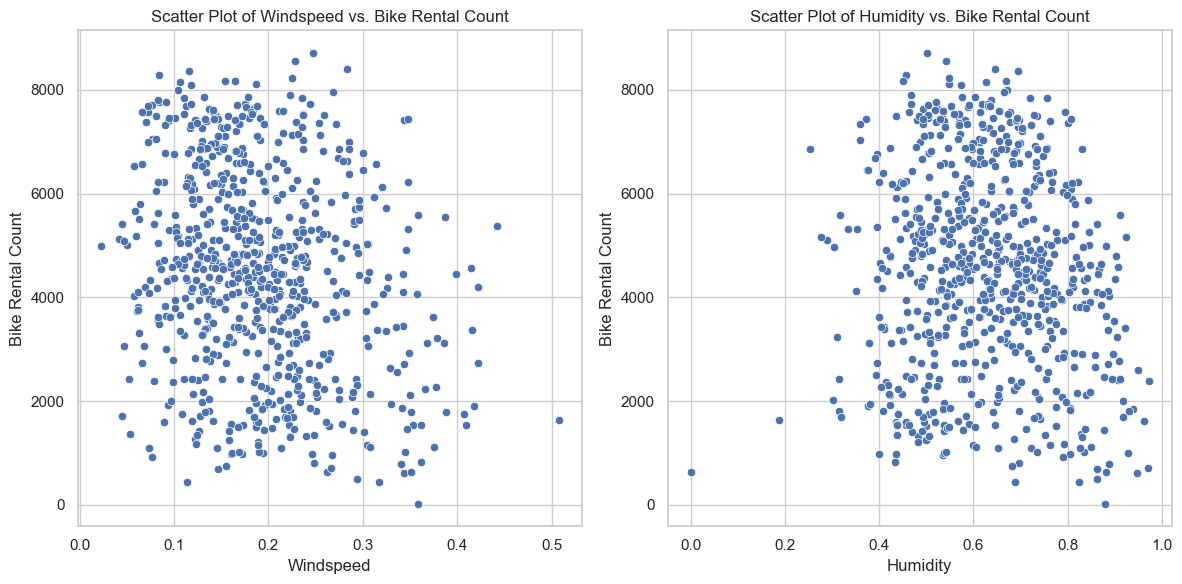

T-Statistic: -6.06
P-Value: 0.0000
Reject the null hypothesis: There is a significant difference in bike rental counts between windy and non-windy days based on windspeed.


In [44]:
# Visualisasi data
plt.figure(figsize=(12, 6))

# Scatter plot dari windspeed vs. bike rental count (cnt)
plt.subplot(1, 2, 1)
sns.scatterplot(data=data_1, x='windspeed', y='cnt')
plt.title('Scatter Plot of Windspeed vs. Bike Rental Count')
plt.xlabel('Windspeed')
plt.ylabel('Bike Rental Count')

# Scatter plot dari humidity vs. bike rental count (cnt)
plt.subplot(1, 2, 2)
sns.scatterplot(data=data_1, x='hum', y='cnt')
plt.title('Scatter Plot of Humidity vs. Bike Rental Count')
plt.xlabel('Humidity')
plt.ylabel('Bike Rental Count')

plt.tight_layout()
plt.show()

# Pengujian hipotesis (Example: t-test for windspeed)
# Bagi data menjadi dua kelompok: hari berangin (windspeed >= median) and hari tidak berangin (windspeed < median)
windy_days = data_1[data_1['windspeed'] >= data_1['windspeed'].median()]
non_windy_days = data_1[data_1['windspeed'] < data_1['windspeed'].median()]

# Lakukan uji-t untuk membandingkan jumlah sewa pada hari berangin vs. tidak berangin
t_stat, p_value = ttest_ind(windy_days['cnt'], non_windy_days['cnt'])

print(f"T-Statistic: {t_stat:.2f}")
print(f"P-Value: {p_value:.4f}")

# Interpretasi hasil uji-t
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference in bike rental counts between windy and non-windy days based on windspeed.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in bike rental counts between windy and non-windy days based on windspeed.")

### Pertanyaan 2: 

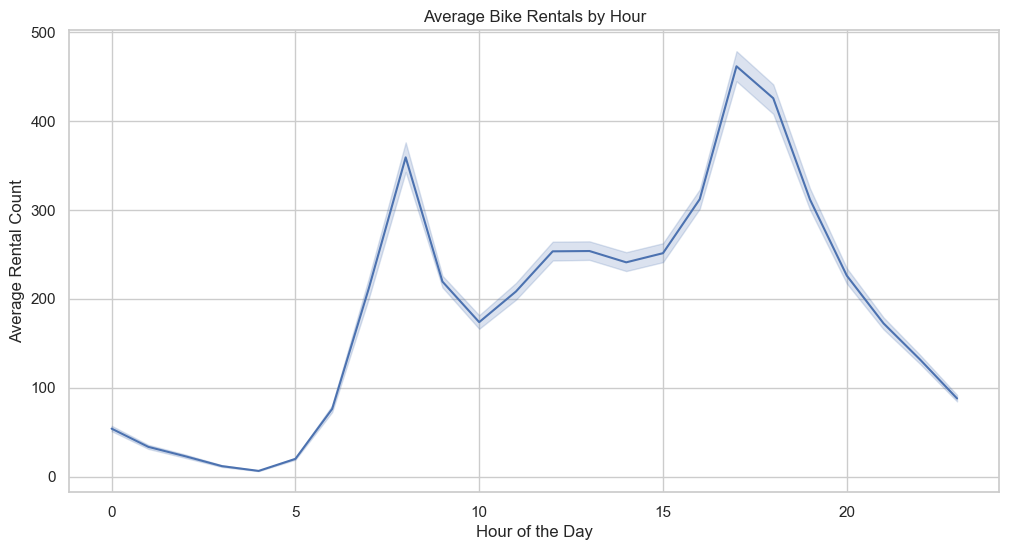

In [45]:
# Pemrosesan awal data
# Ubah 'dteday' kolom menjadi format datetime 
data_2['dteday'] = pd.to_datetime(data_2['dteday'])

# Visualisasi data

# Buat plot garis untuk menunjukkan jumlah sewa per jam
plt.figure(figsize=(12, 6))
sns.lineplot(x='hr', y='cnt', data=data_2, estimator='mean')
plt.title("Average Bike Rentals by Hour")
plt.xlabel("Hour of the Day")
plt.ylabel("Average Rental Count")
plt.grid(True)
plt.show()

## Conclusion

- Conclution pertanyaan 1

Terdapat perbedaan signifikan dalam jumlah sewa sepeda antara hari berangin dan tidak berangin berdasarkan kecepatan angin. Nilai T-statistik negatif sebesar -6,06 dan nilai p yang sangat rendah sebesar 0,0000 menunjukkan signifikansi statistik yang kuat. Oleh karena itu, kami menolak hipotesis nol yang berarti kecepatan angin mempunyai pengaruh yang signifikan terhadap keputusan masyarakat untuk menyewa sepeda.

- Conclution pertanyaan 2

Dalam analisis ini, kita dapat menyimpulkan tentang pola peminjaman sepeda berdasarkan waktu (jam) dari dataset yang diberikan:

Puncak Peminjaman Tertinggi (Top 5 Jam):

Jam 17:00 (5:00 PM) memiliki rata-rata peminjaman tertinggi sekitar 461.
Jam 18:00 (6:00 PM) menduduki peringkat kedua dengan rata-rata peminjaman sekitar 426.
Jam 08:00 (8:00 AM) juga menjadi salah satu jam dengan peminjaman tinggi, rata-ratanya adalah sekitar 359.
Jam 16:00 (4:00 PM) dan jam 19:00 (7:00 PM) juga memiliki rata-rata peminjaman yang signifikan.
Peminjaman Terendah (Top 5 Jam):

Jam 04:00 (4:00 AM) adalah jam dengan rata-rata peminjaman terendah, hanya sekitar 6.
Jam 03:00 (3:00 AM), jam 05:00 (5:00 AM), jam 02:00 (2:00 AM), dan jam 01:00 (1:00 AM) juga termasuk jam-jam dengan peminjaman terendah.
Jadi, berdasarkan data ini, kita dapat menyimpulkan bahwa jam-jam puncak peminjaman terjadi pada sore hingga malam hari (17:00 - 19:00) dengan jam 17:00 (5:00 PM) menjadi yang tertinggi. Sebaliknya, jam-jam dengan peminjaman terendah terjadi pada dini hari (01:00 - 05:00) dengan jam 04:00 (4:00 AM) menjadi yang terendah. Informasi ini dapat berguna untuk mengelola stok sepeda dan perencanaan operasional sistem penyewaan sepeda.